In [1]:
%pip install matplotlib
%pip install ultralytics

import cv2
import numpy as np
import matplotlib.pyplot as plt

import sys
%pwd


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


'/Users/amy/code/homeplate/homeplate/python'

In [3]:
def get_resized_image_from_path(image_path):
    mat_bgr = cv2.imread(image_path)
    print(f"ORIGINAL: Image Width {mat_bgr.shape[1]} Height {mat_bgr.shape[0]}")
    
    scale = 2600 / mat_bgr.shape[1]
    mat_bgr = cv2.resize(mat_bgr, None, fx=scale, fy=2, interpolation=cv2.INTER_LINEAR)

    print(f"RESIZED: Image Width {mat_bgr.shape[1]} Height {mat_bgr.shape[0]}")

    return mat_bgr

def show_bgr_image(im):
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

def get_white_balanced_image(image):
    image = image.astype(np.float32)

    b, g, r = cv2.split(image)
    
    max_b, max_g, max_r = np.max(b), np.max(g), np.max(r)
    print(f"Max values - B: {max_b}, G: {max_g}, R: {max_r}")

    b = b * (255.0 / max_b)
    g = g * (255.0 / max_g)
    r = r * (255.0 / max_r)

    balanced_image = cv2.merge([b, g, r])
    balanced_image = np.clip(balanced_image, 0, 255).astype(np.uint8)

    return balanced_image



In [17]:
image = get_resized_image_from_path

FileName ../images/test0.jpg
Index where value is 98: 100
Calculated HSV Value: 160
Image Width 4000 Height 2252


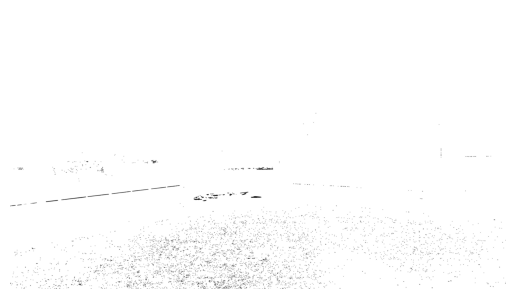

Keypoints found 3
Keypoint found size 51.00048065185547 x 338.4974365234375 y 1543.889404296875 angle -1.0
Keypoint found size 45.35636520385742 x 1984.103759765625 y 1512.24365234375 angle -1.0
Keypoint found size 34.1378059387207 x 1299.6773681640625 y 1426.9918212890625 angle -1.0


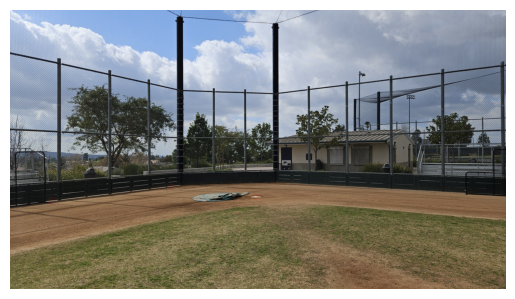

In [68]:
find_home_plate_with_hsv_balancing('../images/test0.jpg')

FileName ../images/test3.png
Index where value is 98: 147
Calculated HSV Value: 160
Image Width 1332 Height 996


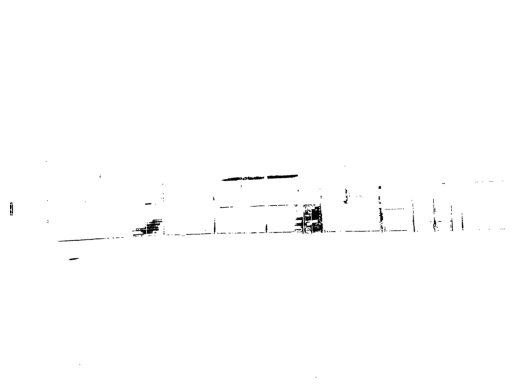

Keypoints found 2
Rectangle found, area 368.0
Rectangle found, area 1311.0
*** Rectangle width > height
Rectangle found, area 2233.0
*** Rectangle width > height
Rectangle found, area 4477.0
*** Rectangle width > height
Keypoint found size 29.70756721496582 x 342.2171630859375 y 1345.550048828125 angle -1.0
Keypoint found size 34.343563079833984 x 1101.2142333984375 y 1178.8089599609375 angle -1.0


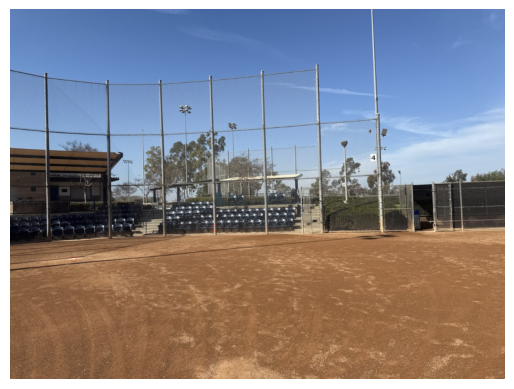

In [69]:
find_home_plate_with_hsv_balancing('../images/test3.png')

FileName ../images/test4.png
Index where value is 98: 200
Calculated HSV Value: 210
Image Width 1776 Height 986


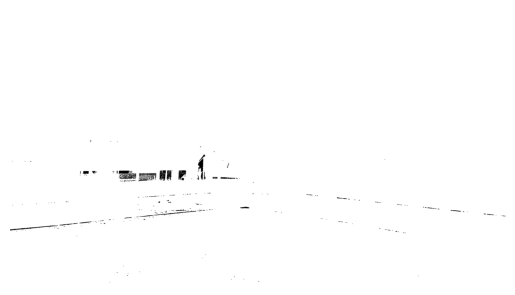

Keypoints found 5
Rectangle found, area 343.5
*** Rectangle width > height
Keypoint found size 28.166589736938477 x 380.6672058105469 y 1541.5361328125 angle -1.0
Keypoint found size 42.28981018066406 x 539.9049682617188 y 1524.5487060546875 angle -1.0
Keypoint found size 35.64512252807617 x 1682.0755615234375 y 1418.89404296875 angle -1.0
Keypoint found size 47.52750015258789 x 1545.833251953125 y 1207.584716796875 angle -1.0
Keypoint found size 19.883230209350586 x 1468.064208984375 y 1205.7891845703125 angle -1.0


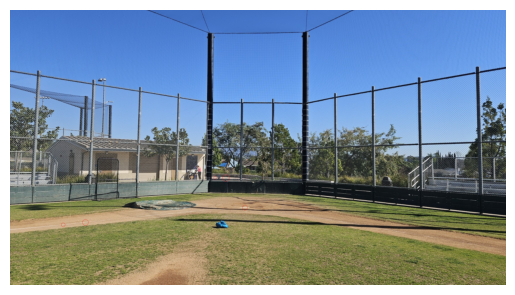

In [70]:
find_home_plate_with_hsv_balancing('../images/test4.png')

# White Balancing
Using histogram-based white balancing

In [71]:
def white_balance_histogram(image):
    b, g, r = cv2.split(image)

    b = cv2.equalizeHist(b)
    g = cv2.equalizeHist(g)
    r = cv2.equalizeHist(r)

    balanced_image = cv2.merge([b, g, r])
    return balanced_image


def white_balance_white_patch(image):
    image = image.astype(np.float32)

    b, g, r = cv2.split(image)
    
    max_b, max_g, max_r = np.max(b), np.max(g), np.max(r)
    print(f"Max values - B: {max_b}, G: {max_g}, R: {max_r}")

    b = b * (255.0 / max_b)
    g = g * (255.0 / max_g)
    r = r * (255.0 / max_r)

    balanced_image = cv2.merge([b, g, r])
    balanced_image = np.clip(balanced_image, 0, 255).astype(np.uint8)

    return balanced_image


In [72]:
def show_image(im):
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im_rgb)
    plt.axis('off')  # Hide axes
    plt.show()



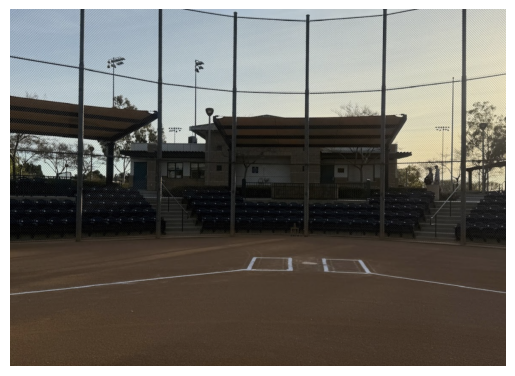

Max values - B: 244.0, G: 251.0, R: 254.0


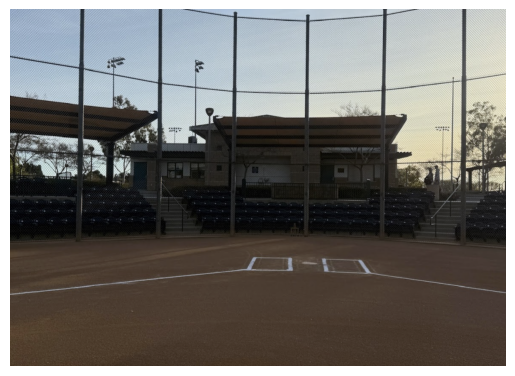

In [73]:
im = cv2.imread('../images/test10.png')
show_image(im)

# white_balanced_image = white_balance_histogram(im)
# show_image(white_balanced_image)

white_balanced_from_patch = white_balance_white_patch(im)
show_image(white_balanced_from_patch)


Index where value is 98: 72
Calculated HSV Value: 82
Image Width 1402 Height 1008


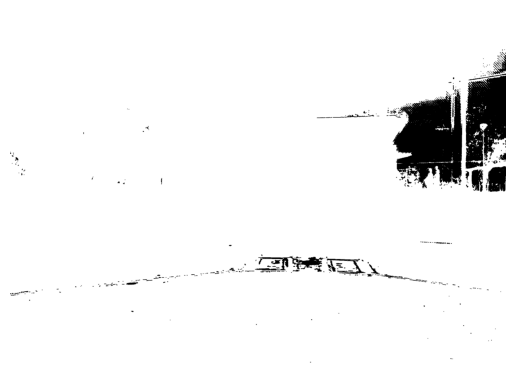

Keypoints found 2
Rectangle found, area 850.0
*** Rectangle width > height
Keypoint found size 38.482906341552734 x 688.7140502929688 y 1549.9881591796875 angle -1.0
Keypoint found size 19.095264434814453 x 2031.589599609375 y 1503.0755615234375 angle -1.0


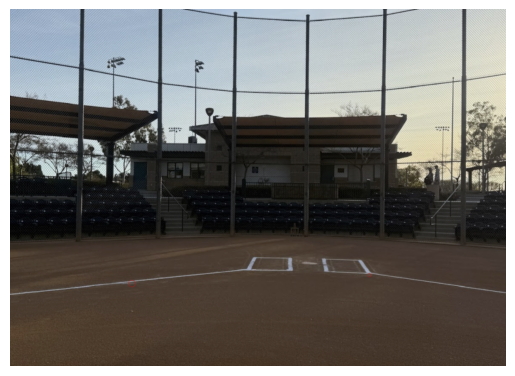

In [74]:
find_home_plate_with_hsv_balancing_from_mat(white_balanced_from_patch)


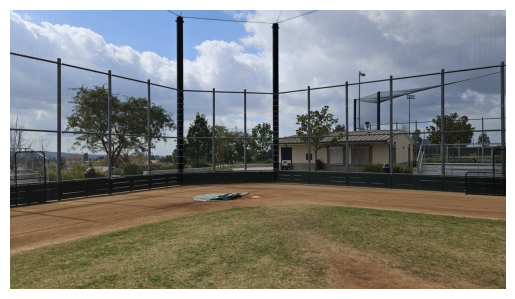

Max values - B: 255.0, G: 255.0, R: 255.0


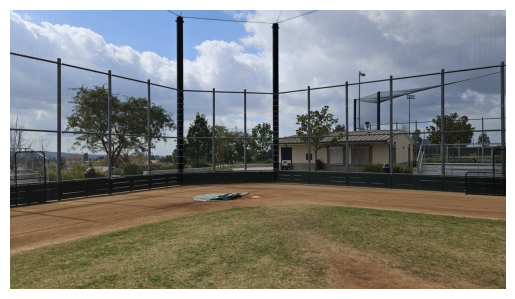

Index where value is 98: 100
Calculated HSV Value: 110
Image Width 4000 Height 2252


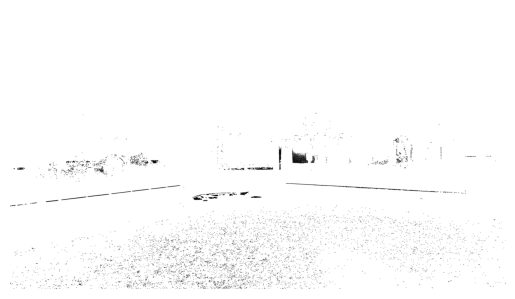

Keypoints found 4
Keypoint found size 52.68870544433594 x 339.2064208984375 y 1543.9273681640625 angle -1.0
Keypoint found size 39.24308776855469 x 1510.43701171875 y 1525.3726806640625 angle -1.0
Keypoint found size 45.35636520385742 x 1984.103759765625 y 1512.24365234375 angle -1.0
Keypoint found size 42.8557014465332 x 1885.5296630859375 y 1482.96142578125 angle -1.0


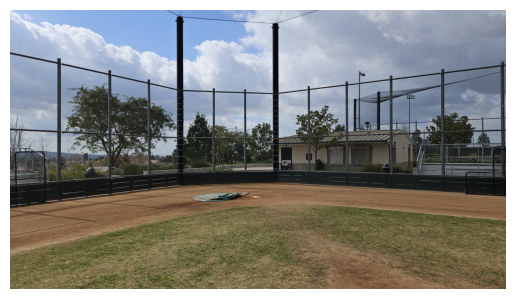

In [75]:
im = cv2.imread('../images/test0.jpg')
show_image(im)

# white_balanced_image = white_balance_histogram(im)
# show_image(white_balanced_image)

white_balanced_from_patch = white_balance_white_patch(im)
show_image(white_balanced_from_patch)

find_home_plate_with_hsv_balancing_from_mat(white_balanced_from_patch)
